# Honey Bees Classification using Deep Learning

This project includes implementation of deep learning based architectures for classification of four types of honeybees classification of bees was highly required to understand the characterstics of them which can be used to determine and detect the health of the Bee hive’s,honeybess are the most important Pollinators in our ecosystem.By this we can boost the process of Pollination which will result in high quality food products for us 


 Every third bite of food relies on pollination by bees. The most important thing that bees do is pollinate. Pollination is needed for plants to reproduce, and so many plants depend on bees or other insects as pollinators. At the same time, this past winter honeybee hive losses have exceeded 60% in some states. How can we address this issue? How can we better understand our bees? And most importantly, how can we save them before it's too late? 

**Libraries used**

* **Matplotlib**-Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
* **Cv2**- cv2is a library of Python bindings designed to solve computer vision problems.
* **Tensorflow**- tensorFlow is a free and open-source software library for machine learning. It can be used across a range of   tasks   but has a particular focus on training and inference of deep neural networks. Tensorflow is a symbolic math library based on     dataflow and differentiable programming
* **Keras** - Keras is an open-source software library that provides a Python interface for artificial neural networks. Keras acts     as an interface for the TensorFlow library.


In [1]:
#Import necessary libraries#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import cv2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
import tensorflow as tf

* The Dataset used here is Annotated HoneyBee Image Dataset from Kaggle 

* It consisted of 4 categories of 

* Bee images of dimension (72x72x3),3 signifying the RGB channel of colored images .

* The dataset consisted of 5173 images in which 4143 was used for training the model

* 500 for validation and 500 for test.Below are some sample images from our dataset**

** Below are some sample images from our dataset **

In [3]:
img1=image.load_img("D:\\Data Science\\Project\\Project Bees Classification\\bees\\train\\category0\\039_009.png")
img2=image.load_img("D:\\Data Science\\Project\\Project Bees Classification\\bees\\train\\category1\\001_047.png")
img3=image.load_img("D:\\Data Science\\Project\\Project Bees Classification\\bees\\train\\category2\\031_002.png")
img4=image.load_img("D:\\Data Science\\Project\\Project Bees Classification\\bees\\train\\category3\\013_022.png")


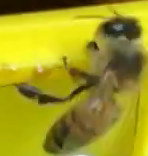

In [4]:
img1

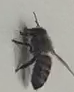

In [5]:
img2

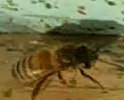

In [6]:
img3

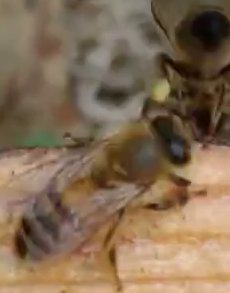

In [7]:
img4

In [8]:
DATA_DIR="D:/Data Science/Project/Project Honeybee Classification/bees/train" #giving path of our dataset

In [9]:
CATEGORIES=['category0','category1','category2','category3'] #labelling output classes

* During training, the machine adjusts its internal parameters to project each feature tensor close to its target. 
* After training, the machine can be used to predict the target for previously unseen feature tensors. 
* What this study focuses on is the requirement that feature tensors must be of the same size. 
* In other words, the same number of features must be present for each sample.
* Hence we need to resize every image present in our dataset

In [10]:
IMG_SIZE=224 #setting image size

In [11]:
training=[]

In [12]:
#importing dataset from working directory#
for category in CATEGORIES:
    path=os.path.join(DATA_DIR,category) #path to our data
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        training.append([new_array,class_num])
        

In [13]:
print(len(training))

5143


* Shuffle is used to shuffle a sequence (list). 
* Shuffling means changing the position of the elements of the sequence.
* If not shuffling data, the data can be sorted or similar data points will lie next to each other 
* Which leads to slow convergence

In [14]:
import random

random.shuffle(training)


In [15]:
#labelling features and labels in X and Y and reshaping it#

X=[]
y=[]

for features,label in training:
    X.append(features)
    y.append(label)
    
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

In [16]:
#Shape of X#
X.shape

(5143, 224, 224, 3)

In [17]:
X[1].shape

(224, 224, 3)

In [18]:
#Converting y to numpy array#
y=np.array(y)

In [19]:
#checking shape of target class
y.shape

(5143,)

* The train-test split procedure is used to estimate the performance of our algorithms 

* When they are used to make predictions on data not used to train the model.

* It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning   * 

* Algorithms for your predictive modeling problem. 

* Although simple to use and interpret,

In [20]:
#Converting data into training and testing#

from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [22]:
#Normlising the train data and converting to float datatype#

X_train = np.array(X_train, dtype=np.float16) / 225.0

X_test = np.array(X_test, dtype=np.float16) / 225.0

* Machine learning and deep learning models, like those in Keras, require all input and output variables to be numeric.

* This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.

In [23]:
#Converting to categorical#

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

* **Filters**-In Convolutional Neural Networks, Filters detect spatial patterns such as edges in an image by detecting the changes in intensity values of the image there are diffrent kinds of filter present for performing diffrent operations.

* **Kernels**-In Convolutional neural network, the kernel is nothing but a filter that is used to extract the features from the images. The kernel is a matrix that moves over the input data, performs the dot product with the sub-region of input data, and gets the output as the matrix of dot products

* **Padding**-Padding is a term relevant to convolutional neural networks as it refers to the amount of pixels added to an image when it is being processed by the kernel of a CNN.

* **Activation Functions**-An activation function is a very important feature of an artificial neural network , they basically decide whether the neuron should be activated or not. In artificial neural networks, the activation function defines the output of that node given an input or set of inputs.

In [24]:
### Create Model from scratch using CNN

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(4,activation="softmax"))

model.summary() 

    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

* Machines learn by means of a loss function. It’s a method of evaluating how well specific algorithm models the given data. If predictions deviates too much from actual results, loss function would cough up a very large number. Gradually, with the help of some optimization function, loss function learns to reduce the error in prediction. In this article we will go through several loss functions and their applications in the domain of machine/deep learning.


* **Categorical Cross Entropy**-Categorical crossentropy is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one.
Formally, it is designed to quantify the difference between two probability distributions.

In [25]:
#compiling our model#

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [26]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

In [ ]:
#run with 50 epochs as well as plots#

In [52]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,validation_data = (x_val,y_val))

Epoch 1/50
26/26 [==============================] - 100s 4s/step - loss: 1.0418 - accuracy: 0.5737 - val_loss: 0.7880 - val_accuracy: 0.7424
Epoch 2/50
26/26 [==============================] - 95s 4s/step - loss: 0.6806 - accuracy: 0.7757 - val_loss: 0.5285 - val_accuracy: 0.8287
Epoch 3/50
26/26 [==============================] - 97s 4s/step - loss: 0.4471 - accuracy: 0.8524 - val_loss: 0.3683 - val_accuracy: 0.8688
Epoch 4/50
26/26 [==============================] - 99s 4s/step - loss: 0.3261 - accuracy: 0.8965 - val_loss: 0.2967 - val_accuracy: 0.9137
Epoch 5/50
26/26 [==============================] - 95s 4s/step - loss: 0.2644 - accuracy: 0.9227 - val_loss: 0.2312 - val_accuracy: 0.9356
Epoch 6/50
26/26 [==============================] - 96s 4s/step - loss: 0.2163 - accuracy: 0.9422 - val_loss: 0.2162 - val_accuracy: 0.9417
Epoch 7/50
26/26 [==============================] - 115s 4s/step - loss: 0.1852 - accuracy: 0.9437 - val_loss: 0.1694 - val_accuracy: 0.9538
Epoch 8/50
26/26 [

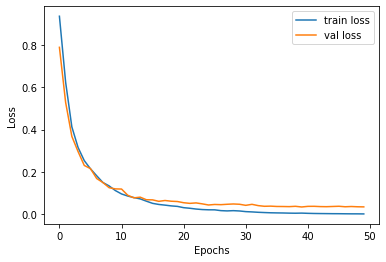

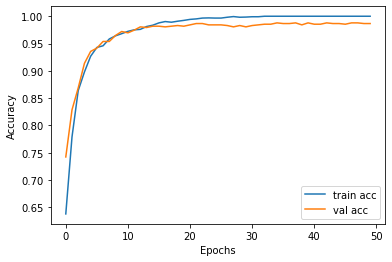

In [53]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')



As we can see by taking 50 epochs the model is giving us similiar accuracy and there is no decrease in loss function too Hence there is no meaning in taking 50 epochs it will just increase our computation power of the machine hence we will re train our model with less no of epochs which will give us some better results

In [27]:
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,validation_data = (x_val,y_val))

Epoch 1/20
26/26 [==============================] - 99s 4s/step - loss: 1.1570 - accuracy: 0.6091 - val_loss: 0.9206 - val_accuracy: 0.6513
Epoch 2/20
26/26 [==============================] - 93s 4s/step - loss: 0.8514 - accuracy: 0.6751 - val_loss: 0.8186 - val_accuracy: 0.7108
Epoch 3/20
26/26 [==============================] - 92s 4s/step - loss: 0.7460 - accuracy: 0.7211 - val_loss: 0.6683 - val_accuracy: 0.7351
Epoch 4/20
26/26 [==============================] - 94s 4s/step - loss: 0.6233 - accuracy: 0.7624 - val_loss: 0.5759 - val_accuracy: 0.8202
Epoch 5/20
26/26 [==============================] - 95s 4s/step - loss: 0.5007 - accuracy: 0.8309 - val_loss: 0.5153 - val_accuracy: 0.8080
Epoch 6/20
26/26 [==============================] - 92s 4s/step - loss: 0.4295 - accuracy: 0.8589 - val_loss: 0.4179 - val_accuracy: 0.8663
Epoch 7/20
26/26 [==============================] - 92s 4s/step - loss: 0.3642 - accuracy: 0.8863 - val_loss: 0.3582 - val_accuracy: 0.9016
Epoch 8/20
26/26 [==

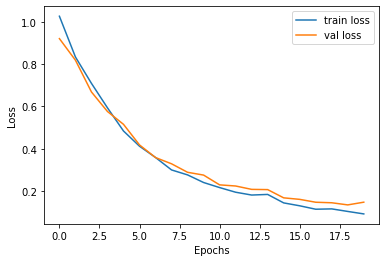

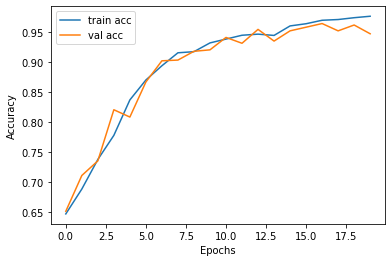

In [28]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#plt.savefig('AccVal_acc

After training model with 20 epochs we got training accuracy of 99.19% and validation accuracy of 97.08% with loss of 0.0377 and 0.0978 for training and validation respectively.

        


In [31]:
#Calculating the train accuracy#

print("[INFO] Calculating model accuracy")
scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
33/33 [==============================] - 10s 295ms/step - loss: 0.1744 - accuracy: 0.9427
Test Accuracy: 94.266277551651


In [32]:
#Predicting y_pred from our trained model#

y_pred = model.predict(X_test)

In [33]:
y_pred

array([[5.7700276e-05, 9.9003124e-01, 9.6075926e-03, 3.0341299e-04],
       [2.8129769e-04, 9.0241969e-01, 9.7220100e-02, 7.8985271e-05],
       [3.1681190e-04, 9.7766727e-01, 2.1958172e-02, 5.7833673e-05],
       ...,
       [2.9224175e-04, 7.3019415e-01, 4.3056990e-04, 2.6908302e-01],
       [1.4891587e-04, 3.5582110e-02, 9.6422708e-01, 4.1788451e-05],
       [8.9454870e-06, 9.6955734e-01, 3.0409941e-02, 2.3863255e-05]],
      dtype=float32)

In [34]:
#giving argmax function to return max element from array#

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [35]:
y_pred

array([1, 1, 1, ..., 1, 2, 1], dtype=int64)

In [36]:
#testing our model from a sample image from test set#

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [37]:
img=image.load_img('D:\\Data Science\\Project\\Project Bees Classification\\bees\\test\\category2\\040_299.png',target_size=(224,224))

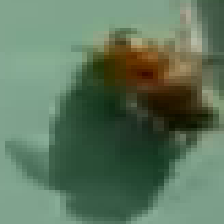

In [38]:
img

In [39]:
#Converting image to array #

x=image.img_to_array(img)
x

array([[[130., 165., 142.],
        [130., 165., 142.],
        [130., 165., 142.],
        ...,
        [ 56.,  82.,  59.],
        [ 56.,  82.,  59.],
        [ 56.,  82.,  59.]],

       [[130., 165., 142.],
        [130., 165., 142.],
        [130., 165., 142.],
        ...,
        [ 56.,  82.,  59.],
        [ 56.,  82.,  59.],
        [ 56.,  82.,  59.]],

       [[130., 165., 142.],
        [130., 165., 142.],
        [130., 165., 142.],
        ...,
        [ 56.,  82.,  59.],
        [ 56.,  82.,  59.],
        [ 56.,  82.,  59.]],

       ...,

       [[128., 163., 142.],
        [128., 163., 142.],
        [128., 163., 142.],
        ...,
        [123., 158., 137.],
        [123., 158., 137.],
        [123., 158., 137.]],

       [[128., 163., 142.],
        [128., 163., 142.],
        [128., 163., 142.],
        ...,
        [123., 158., 137.],
        [123., 158., 137.],
        [123., 158., 137.]],

       [[128., 163., 142.],
        [128., 163., 142.],
        [128., 1

In [40]:
x=x/255

In [41]:
x=np.expand_dims(x,axis=0)

In [42]:
a=np.argmax(model.predict(x), axis=1)

In [43]:
print(a)

[2]


In [44]:
#Conditions to classify our image#

if (a==0):
    print('Category0')
if (a==1):
    print("Category1")
if (a==2):
    print('Category2')
if (a==3):
    print('Category3')

Category2


In [63]:
#y_test=np.argmax(y_test,axis=0)

In [45]:
y_test.dtype

dtype('float32')

In [46]:
y_test

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [47]:
y_test1=np.argmax(y_test,axis=1)

In [48]:
y_test1

array([1, 1, 1, ..., 1, 2, 1], dtype=int64)

In [45]:
#y_pred=tf.one_hot(y_pred, depth=4)

In [67]:
y_pred.dtype

dtype('float32')

* A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. T
* The matrix compares the actual target values with those predicted by the machine learning model.
* The classification report visualizer displays the precision, recall, F1, and support scores for the model. 

In [51]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test1, y_pred)

In [53]:
cm

array([[ 27,  15,   0,   4],
       [  4, 662,   1,   0],
       [  1,  27, 178,   0],
       [  1,   6,   0, 103]], dtype=int64)

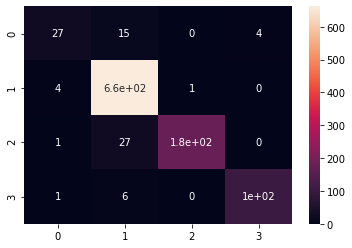

In [52]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [58]:
from sklearn.metrics import classification_report

In [59]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        48
           1       0.98      0.99      0.98       685
           2       0.98      0.98      0.98       213
           3       0.99      0.99      0.99        83

   micro avg       0.98      0.98      0.98      1029
   macro avg       0.97      0.95      0.96      1029
weighted avg       0.98      0.98      0.98      1029
 samples avg       0.98      0.98      0.98      1029

